In [226]:
from urllib.request import urlretrieve
import pandas as pd

In [175]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

covid_df = pd.read_csv(italy_covid_url)
covid_df = pd.DataFrame(covid_df)
print(covid_df)

           date  new_cases  new_deaths  new_tests
0    2019-12-31        0.0         0.0        NaN
1    2020-01-01        0.0         0.0        NaN
2    2020-01-02        0.0         0.0        NaN
3    2020-01-03        0.0         0.0        NaN
4    2020-01-04        0.0         0.0        NaN
..          ...        ...         ...        ...
243  2020-08-30     1444.0         1.0    53541.0
244  2020-08-31     1365.0         4.0    42583.0
245  2020-09-01      996.0         6.0    54395.0
246  2020-09-02      975.0         8.0        NaN
247  2020-09-03     1326.0         6.0        NaN

[248 rows x 4 columns]


In [176]:
# prints out top five rows by default
covid_df.head(10)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN
7,2020-01-07,0.0,0.0,NaN
8,2020-01-08,0.0,0.0,NaN
9,2020-01-09,0.0,0.0,NaN


In [177]:
# prints out last five rows by default
covid_df.tail(10)

,date,new_cases,new_deaths,new_tests
238,2020-08-25,953.0,4.0,45798.0
239,2020-08-26,876.0,4.0,58054.0
240,2020-08-27,1366.0,13.0,57640.0
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [178]:
# Object is a generic data type when panda can not figure out the data type specified
covid_df.info()

covid_df.describe()

covid_df.columns

covid_df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


(248, 4)

In [179]:
# Retrieve data from dataframe
# Internal representation of a data frame
# A dictionary or list

# Pandas format is simliar to this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

print(covid_data_dict)

{'date': ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'], 'new_cases': [1444, 1365, 996, 975, 1326], 'new_deaths': [1, 4, 6, 8, 6], 'new_tests': [53541, 42583, 54395, None, None]}


In [180]:
# Access data based on row range
# To access a specific row of data, Pandas provides the `.loc` method.
covid_df.loc[1:2]
# Access columns based on labels
# Further, you can also pass a list of columns within the indexing notation `[]` 
# to access a subset of the data frame with just the given columns.
covid_df[['new_cases','new_deaths']]
# Access at specified index
covid_df.at[200, 'new_tests']

27569.0

In [181]:
#print(covid_df.loc[1:10,['new_cases','new_deaths']])


In [182]:
# What are the total number of reported cases and deaths related to Covid-19 in Italy?
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()
print(total_cases)
print(total_deaths)

271515.0
35497.0


In [183]:
# What is the overall death rate (ratio of reported deaths to reported cases)?
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()
print(death_rate)

0.13073679170579894


In [184]:
# What is the overall number of tests conducted? A total of 935310 tests were conducted before daily 
# test numbers were reported.

initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()
print(total_tests)

5214766.0


In [185]:
# What fraction of tests returned a positive result?
positive_rate = total_cases / total_tests
print('{:.2f}% of tests in Italy led to a positive diagnosis.'.format(positive_rate*100))

5.21% of tests in Italy led to a positive diagnosis.


In [186]:
# Querying and sorting rows
high_new_cases = covid_df.new_cases > 1000
# The boolean expression returns a series containing `True` and `False` boolean values. 
# You can use this series to select a subset of rows from the original dataframe, corresponding to the 
# `True` values in the series.
covid_df[high_new_cases]

# We can write this succinctly on a single line by passing the boolean expression as an index to the data frame.
high_cases_df = covid_df[covid_df.new_cases > 1000]
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [187]:
locate = covid_df.loc[10:50:2] # For locating rows. start:end:increament
locate

,date,new_cases,new_deaths,new_tests
10,2020-01-10,0.0,0.0,NaN
12,2020-01-12,0.0,0.0,NaN
14,2020-01-14,0.0,0.0,NaN
16,2020-01-16,0.0,0.0,NaN
18,2020-01-18,0.0,0.0,NaN
20,2020-01-20,0.0,0.0,NaN
22,2020-01-22,0.0,0.0,NaN
24,2020-01-24,0.0,0.0,NaN
26,2020-01-26,0.0,0.0,NaN
28,2020-01-28,0.0,0.0,NaN


In [188]:
covid_df.loc[10:20,['date','new_cases']] # This will print out rows and columns

,date,new_cases
10,2020-01-10,0.0
11,2020-01-11,0.0
12,2020-01-12,0.0
13,2020-01-13,0.0
14,2020-01-14,0.0
15,2020-01-15,0.0
16,2020-01-16,0.0
17,2020-01-17,0.0
18,2020-01-18,0.0
19,2020-01-19,0.0


In [189]:
covid_df


,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [190]:
covid_df.iloc[2:7,3:5] # First set of argument is for rows and second is for columns

,new_tests
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN


In [191]:
covid_df.query('date == ["2020-08-21","2020-08-23","2020-08-24","2020-08-25","2020-08-26","2020-08-28"] & (new_cases>2)')

,date,new_cases,new_deaths,new_tests
234,2020-08-21,840.0,6.0,44943.0
236,2020-08-23,1071.0,3.0,47463.0
237,2020-08-24,1209.0,7.0,33358.0
238,2020-08-25,953.0,4.0,45798.0
239,2020-08-26,876.0,4.0,58054.0
241,2020-08-28,1409.0,5.0,65135.0


In [192]:
# Compare two sequences
newDeaths = covid_df['new_deaths']

covid_df['new_cases'].isin(newDeaths)



0       True
1       True
2       True
3       True
4       True
       ...  
243    False
244    False
245    False
246    False
247    False
Name: new_cases, Length: 248, dtype: bool

In [193]:
# Let's try to determine the days when the ratio 
# of cases reported to tests conducted is higher than the overall positive_rate
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]
print(high_ratio_df)

           date  new_cases  new_deaths  new_tests
111  2020-04-20     3047.0       433.0     7841.0
112  2020-04-21     2256.0       454.0    28095.0
113  2020-04-22     2729.0       534.0    44248.0
114  2020-04-23     3370.0       437.0    37083.0
116  2020-04-25     3021.0       420.0    38676.0
117  2020-04-26     2357.0       415.0    24113.0
118  2020-04-27     2324.0       260.0    26678.0
120  2020-04-29     2091.0       382.0    38589.0
123  2020-05-02     1965.0       269.0    31231.0
124  2020-05-03     1900.0       474.0    27047.0
125  2020-05-04     1389.0       174.0    22999.0
128  2020-05-07     1444.0       369.0    13665.0


In [194]:
# We can use this series to add a new column to the data frame.
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [195]:
# For now, let's remove the positive_rate column using the drop method.
covid_df.drop(columns=['positive_rate'], inplace=True)
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [196]:
# Sorting rows using column values
# The rows can also be sorted by a specific column using .sort_values. Let's sort to identify the days with 
# the highest number of cases, then chain it with the head method to list just the first ten results.

covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [197]:
# Working with dates
covid_df.date
covid_df['date'] = pd.to_datetime(covid_df.date)
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [198]:
# You can see that it now has the datatype datetime64. We can now extract different parts of the data into 
# separate columns, using the DatetimeIndex 

covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [199]:
# Let's check the overall metrics for May. We can query the rows for May, choose a subset of columns, and use the 
# `sum` method to aggregate each selected column's values.

# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]

# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [200]:
# As another example, let's check if the number of cases reported on Sundays is higher than the average number of cases reported every day. 
# This time, we might want to aggregate columns using the `.mean` method.

# Overall average
covid_df.new_cases.mean()

1094.8185483870968

In [201]:
# Apply function

def newDeaths(x):
    if x > 5:
        return x
    else:
        return '0'
results = covid_df['new_deaths'].apply(newDeaths)
results

0        0
1        0
2        0
3        0
4        0
      ... 
243      0
244      0
245    6.0
246    8.0
247    6.0
Name: new_deaths, Length: 248, dtype: object

In [228]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444,1.0,53541.0,2020,8,30,6,266853.0,35473.0,5117788.0,Italy
244,2020-08-31,1365,4.0,42583.0,2020,8,31,0,268218.0,35477.0,5160371.0,Italy
245,2020-09-01,996,6.0,54395.0,2020,9,1,1,269214.0,35483.0,5214766.0,Italy
246,2020-09-02,975,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy


In [202]:
# Grouping and aggregation
# As a next step, we might want to summarize the day-wise data and create a new dataframe with month-wise data. 
# We can use the `groupby` function to create a group for each month, select the columns we wish to aggregate, 
# and aggregate them using the `sum` method. 

# covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()
# covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()
# covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].median()
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].std() # you can choose what ever you want instead of std eg mean or sum 
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,0.538816,0.000000,NaN
2,66.312906,1.601262,NaN
3,2126.719931,311.956056,NaN
4,902.348313,137.699944,21590.272945
5,458.224843,91.088188,7403.552952
6,128.762260,27.351354,6736.839506
7,57.262610,7.140826,5155.067222
8,415.171735,27.436888,14592.486959
9,196.867976,1.154701,NaN


In [203]:
covid_weekday_df = covid_df.groupby('weekday')[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_weekday_df

,new_cases,new_deaths,new_tests
weekday,,,
0,38820.0,4368.0,396534.0
1,33071.0,4678.0,623338.0
2,33383.0,5211.0,658639.0
3,39444.0,5093.0,655283.0
4,41640.0,5071.0,745288.0
5,41503.0,5495.0,657200.0
6,43654.0,5581.0,543174.0


In [204]:
covid_day_df = covid_df.groupby('day')[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_day_df

,new_cases,new_deaths,new_tests
day,,,
1,8037.0,1245.0,177410.0
2,8938.0,1096.0,110502.0
3,8998.0,1350.0,86229.0
4,7143.0,1064.0,102887.0
5,7215.0,1017.0,123586.0
6,7254.0,906.0,117747.0
7,6700.0,1140.0,94441.0
8,6573.0,1000.0,117039.0
9,7475.0,1009.0,121011.0


In [205]:
# Apart from grouping, another form of aggregation is the running or cumulative sum of cases, tests, or death up to 
# each row's date. We can use the cumsum method to compute the cumulative sum of a column as a new series. Let's add 
# three new columns: total_cases, total_deaths, and total_tests.

covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN


In [206]:
# Merging data from multiple sources
# To determine other metrics like test per million, cases per million, etc., we require some more information about the 
# country, viz. its population. Let's download another file locations.csv that contains health-related information for 
# many countries, including Italy.

urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'data/locations.csv')

locations_df = pd.read_csv('data/locations.csv')
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [207]:
locations_df[locations_df.location == "Italy"]
# We can merge this data into our existing data frame by adding more columns. However, to merge two data frames, 
# we need at least one common column. Let's insert a location column in the covid_df dataframe with all values set to 
# "Italy".
covid_df['location'] = "Italy"
covid_df

# We can now add the columns from `locations_df` into `covid_df` using the `.merge` method.
merged_df = covid_df.merge(locations_df, on="location")
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [208]:
# The location data for Italy is appended to each row within `covid_df`. If the `covid_df` data frame contained data for 
# multiple locations, then the respective country's location data would be appended for each row.
# We can now calculate metrics like cases per million, deaths per million, and tests per million.

merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4413.578101,586.700753,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4436.154329,586.766910,85349.238862
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4452.627532,586.866146,86248.897403
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4468.753409,586.998461,NaN


In [209]:
# Writing data back to files
# After completing your analysis and adding new columns, you should write the results back to a file. Otherwise, 
# the data will be lost when the Jupyter notebook shuts down. Before writing to file, let us first create a data frame 
# containing just the columns we wish to record.

result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million']]

result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,266853.0,1.0,35473.0,53541.0,5117788.0,4413.578101,586.700753,84644.943252
244,2020-08-31,1365.0,268218.0,4.0,35477.0,42583.0,5160371.0,4436.154329,586.766910,85349.238862
245,2020-09-01,996.0,269214.0,6.0,35483.0,54395.0,5214766.0,4452.627532,586.866146,86248.897403
246,2020-09-02,975.0,270189.0,8.0,35491.0,NaN,NaN,4468.753409,586.998461,NaN


In [210]:
# To write the data from the data frame into a file, we can use the `to_csv` function. 
result_df.to_csv('data/results.csv', index=None)

<AxesSubplot:>

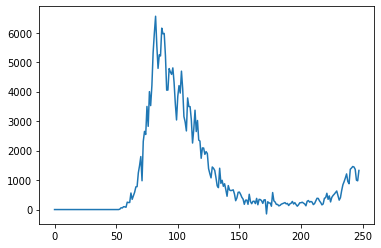

In [211]:
# Basic Plotting with Pandas
# We generally use a library like matplotlib or seaborn plot graphs within a Jupyter notebook. However, Pandas dataframes
#  & series provide a handy .plot method for quick and easy plotting.
result_df.new_cases.plot()


In [212]:
# While this plot shows the overall trend, it's hard to tell where the peak occurred, as there are no dates on the X-axis. 
# We can use the `date` column as the index for the data frame to address this issue.

result_df.set_index('date', inplace=True)
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,266853.0,1.0,35473.0,53541.0,5117788.0,4413.578101,586.700753,84644.943252
2020-08-31,1365.0,268218.0,4.0,35477.0,42583.0,5160371.0,4436.154329,586.766910,85349.238862
2020-09-01,996.0,269214.0,6.0,35483.0,54395.0,5214766.0,4452.627532,586.866146,86248.897403


In [213]:
# Notice that the index of a data frame doesn't have to be numeric. Using the date as the index also allows us
#  to get the data for a specific data using `.loc`.

result_df.loc['2020-09-01']

new_cases             9.960000e+02
total_cases           2.692140e+05
new_deaths            6.000000e+00
total_deaths          3.548300e+04
new_tests             5.439500e+04
total_tests           5.214766e+06
cases_per_million     4.452628e+03
deaths_per_million    5.868661e+02
tests_per_million     8.624890e+04
Name: 2020-09-01 00:00:00, dtype: float64

<AxesSubplot:xlabel='date'>

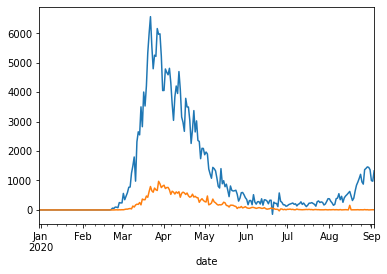

In [214]:
# Let's plot the new cases & new deaths per day as line graphs.
result_df.new_cases.plot()
result_df.new_deaths.plot()

<AxesSubplot:xlabel='date'>

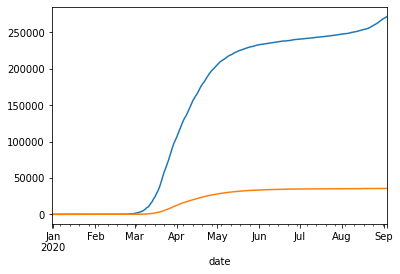

In [215]:
# We can also compare the total cases vs. total deaths.
result_df.total_cases.plot()
result_df.total_deaths.plot()

<AxesSubplot:title={'center':'Death Rate'}, xlabel='date'>

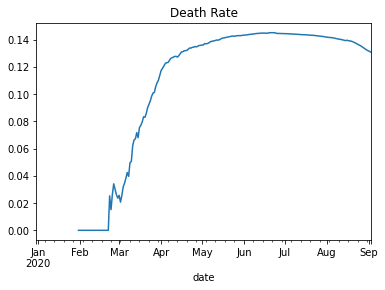

In [216]:
# Let's see how the death rate and positive testing rates vary over time.
death_rate = result_df.total_deaths / result_df.total_cases
death_rate.plot(title='Death Rate')

<AxesSubplot:title={'center':'Positive Rate'}, xlabel='date'>

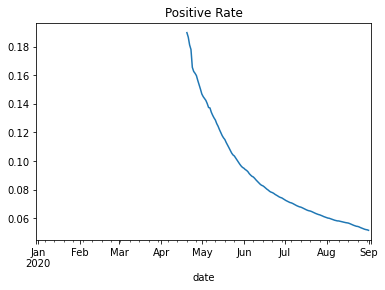

In [217]:
positive_rates = result_df.total_cases / result_df.total_tests
positive_rates.plot(title='Positive Rate')

<AxesSubplot:xlabel='month'>

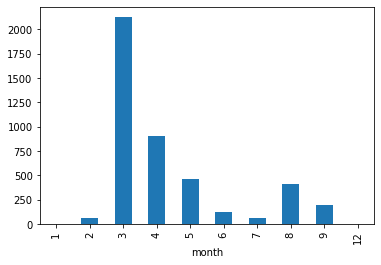

In [218]:
# Finally, let's plot some month-wise data using a bar chart to visualize the trend at a higher level.
covid_month_df.new_cases.plot(kind='bar')

<AxesSubplot:xlabel='month'>

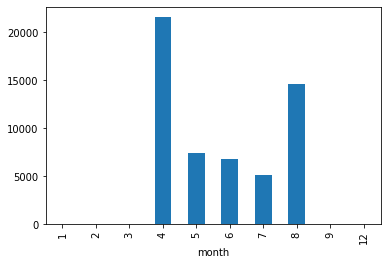

In [219]:
covid_month_df.new_tests.plot(kind='bar')

In [220]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy


In [221]:
covid_df.dropna() # This will drop all the rows with no data

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
111,2020-04-20,3047.0,433.0,7841.0,2020,4,20,0,178972.0,23660.0,943151.0,Italy
112,2020-04-21,2256.0,454.0,28095.0,2020,4,21,1,181228.0,24114.0,971246.0,Italy
113,2020-04-22,2729.0,534.0,44248.0,2020,4,22,2,183957.0,24648.0,1015494.0,Italy
114,2020-04-23,3370.0,437.0,37083.0,2020,4,23,3,187327.0,25085.0,1052577.0,Italy
115,2020-04-24,2646.0,464.0,95273.0,2020,4,24,4,189973.0,25549.0,1147850.0,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0,2020,8,28,4,263949.0,35463.0,4999953.0,Italy
242,2020-08-29,1460.0,9.0,64294.0,2020,8,29,5,265409.0,35472.0,5064247.0,Italy
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,5160371.0,Italy


In [222]:
# drop any columns with missing values
# Column new_tests is dropped
covid_df.dropna(axis='columns',how='any')


,date,new_cases,new_deaths,year,month,day,weekday,total_cases,total_deaths,location
0,2019-12-31,0.0,0.0,2019,12,31,1,0.0,0.0,Italy
1,2020-01-01,0.0,0.0,2020,1,1,2,0.0,0.0,Italy
2,2020-01-02,0.0,0.0,2020,1,2,3,0.0,0.0,Italy
3,2020-01-03,0.0,0.0,2020,1,3,4,0.0,0.0,Italy
4,2020-01-04,0.0,0.0,2020,1,4,5,0.0,0.0,Italy
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,2020,8,30,6,266853.0,35473.0,Italy
244,2020-08-31,1365.0,4.0,2020,8,31,0,268218.0,35477.0,Italy
245,2020-09-01,996.0,6.0,2020,9,1,1,269214.0,35483.0,Italy
246,2020-09-02,975.0,8.0,2020,9,2,2,270189.0,35491.0,Italy


In [223]:
# Drop with respect to condition given
# From index, drop all rows were total_tests == NAN
covid_df.dropna(axis='index',how='any',subset=['total_tests'])

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
111,2020-04-20,3047.0,433.0,7841.0,2020,4,20,0,178972.0,23660.0,943151.0,Italy
112,2020-04-21,2256.0,454.0,28095.0,2020,4,21,1,181228.0,24114.0,971246.0,Italy
113,2020-04-22,2729.0,534.0,44248.0,2020,4,22,2,183957.0,24648.0,1015494.0,Italy
114,2020-04-23,3370.0,437.0,37083.0,2020,4,23,3,187327.0,25085.0,1052577.0,Italy
115,2020-04-24,2646.0,464.0,95273.0,2020,4,24,4,189973.0,25549.0,1147850.0,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0,2020,8,28,4,263949.0,35463.0,4999953.0,Italy
242,2020-08-29,1460.0,9.0,64294.0,2020,8,29,5,265409.0,35472.0,5064247.0,Italy
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,5160371.0,Italy


In [224]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          248 non-null    datetime64[ns]
 1   new_cases     248 non-null    float64       
 2   new_deaths    248 non-null    float64       
 3   new_tests     135 non-null    float64       
 4   year          248 non-null    int64         
 5   month         248 non-null    int64         
 6   day           248 non-null    int64         
 7   weekday       248 non-null    int64         
 8   total_cases   248 non-null    float64       
 9   total_deaths  248 non-null    float64       
 10  total_tests   135 non-null    float64       
 11  location      248 non-null    object        
dtypes: datetime64[ns](1), float64(6), int64(4), object(1)
memory usage: 23.4+ KB


In [225]:
covid_df = covid_df.astype({'new_cases':int})
covid_df = covid_df.astype({'new_deaths':str})
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          248 non-null    datetime64[ns]
 1   new_cases     248 non-null    int32         
 2   new_deaths    248 non-null    object        
 3   new_tests     135 non-null    float64       
 4   year          248 non-null    int64         
 5   month         248 non-null    int64         
 6   day           248 non-null    int64         
 7   weekday       248 non-null    int64         
 8   total_cases   248 non-null    float64       
 9   total_deaths  248 non-null    float64       
 10  total_tests   135 non-null    float64       
 11  location      248 non-null    object        
dtypes: datetime64[ns](1), float64(4), int32(1), int64(4), object(2)
memory usage: 22.4+ KB
